In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split , GridSearchCV , ShuffleSplit
from sklearn.preprocessing import LabelBinarizer , StandardScaler , Normalizer , MinMaxScaler
from sklearn.impute import KNNImputer
##################################################


In [353]:
data = pd.read_csv("train.csv")
y_train = data["Survived"].values
data["Sex"] = data["Sex"].replace({"male" : 0 , "female" : 1})

data.drop(columns=["PassengerId" , "Name" , "Ticket" , "Cabin" , "Embarked" , "Survived"] , inplace=True)

knn_imp = KNNImputer()
data = pd.DataFrame(knn_imp.fit_transform(data) , columns=data.columns)

X_train = data.values

###################################################

In [354]:
test = pd.read_csv("test.csv")
test["Sex"] = test["Sex"].replace({"male" : 0 , "female" : 1})
test.drop(columns=["PassengerId" , "Name" , "Ticket" , "Cabin" , "Embarked" ,] , inplace=True)

knn_imp = KNNImputer()
test = pd.DataFrame(knn_imp.fit_transform(test) , columns=test.columns)

X_test = test.values
y_test = pd.read_csv("gender_submission.csv")["Survived"].values

In [355]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  =scaler.transform(X_test)

In [356]:
from sklearn.svm import SVC

In [357]:
svm_clf = SVC(C=5)
svm_clf.fit(X_train , y_train)
y_pred_train = svm_clf.predict(X_train)
print(classification_report(y_train , y_pred_train) , "\n --------------------------")

y_pred_test = svm_clf.predict(X_test)
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       549
           1       0.84      0.73      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891
 
 --------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       266
           1       0.92      0.92      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [358]:
cv=ShuffleSplit(5,test_size=0.20,random_state=42)

param_grid = {
    "C":np.logspace(0,2 , 50),
    "degree": range(1,10),
}

svm_grid = GridSearchCV(svm_clf,param_grid=param_grid  ,scoring="accuracy" ,return_train_score=True ,verbose=2)
svm_grid.fit(X_train,y_train)
print(svm_grid.best_params_)
svm_grid.best_score_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END ....................................C=1.0, degree=1; total time=   0.0s
[CV] END ....................................C=1.0, degree=1; total time=   0.0s
[CV] END ....................................C=1.0, degree=1; total time=   0.0s
[CV] END ....................................C=1.0, degree=1; total time=   0.0s
[CV] END ....................................C=1.0, degree=1; total time=   0.0s
[CV] END ....................................C=1.0, degree=2; total time=   0.0s
[CV] END ....................................C=1.0, degree=2; total time=   0.0s
[CV] END ....................................C=1.0, degree=2; total time=   0.0s
[CV] END ....................................C=1.0, degree=2; total time=   0.0s
[CV] END ....................................C=1.0, degree=2; total time=   0.0s
[CV] END ....................................C=1.0, degree=3; total time=   0.0s
[CV] END ....................................

0.8305316678174629

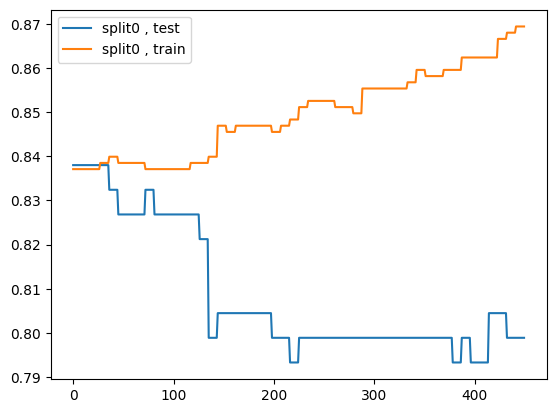

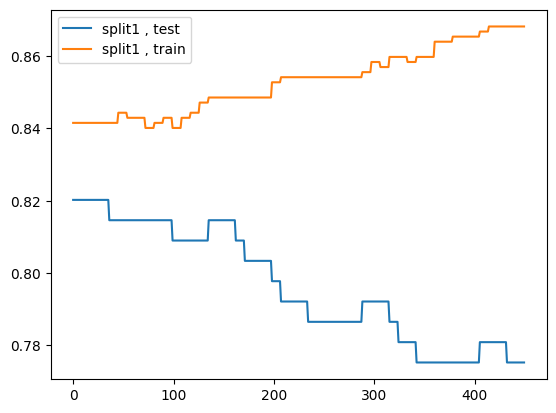

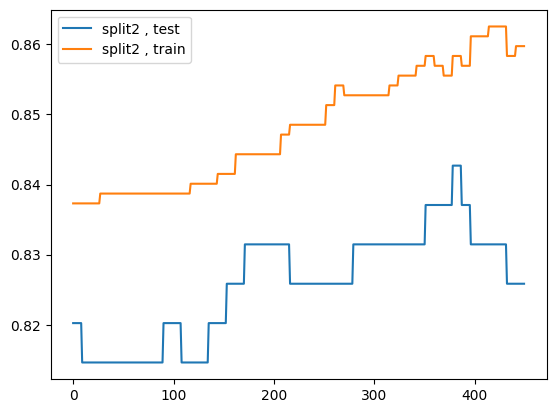

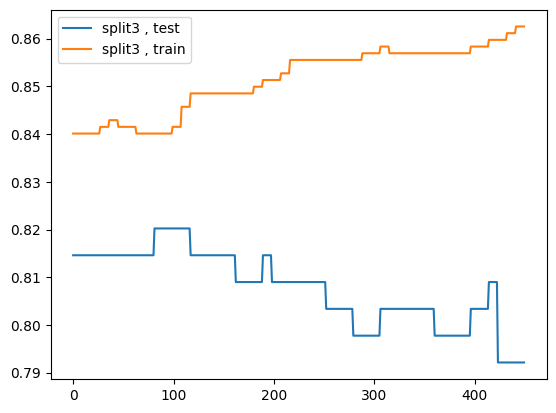

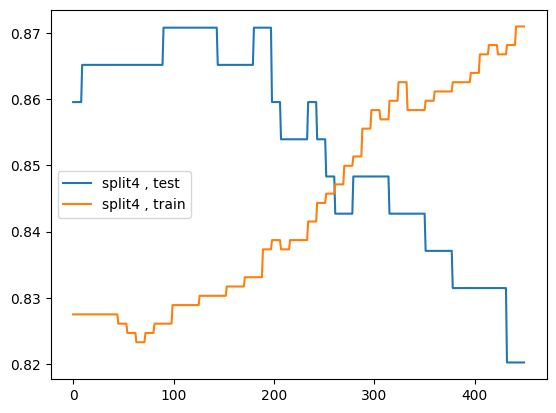

In [359]:
for i in range(0,5):
    plt.plot(svm_grid.cv_results_[f"split{i}_test_score"] , label = f"split{i} , test")
    plt.plot(svm_grid.cv_results_[f"split{i}_train_score"] , label = f"split{i} , train")
    plt.legend()
    plt.show()

In [360]:

best_svm = svm_grid.best_estimator_

best_svm.fit(X_train,y_train)
y_pred = best_svm.predict(X_test)
print(best_svm.score(X_train,y_train))
print(classification_report(y_test,y_pred))

0.8383838383838383
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       266
           1       0.93      0.92      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418

